In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

## 病人信息数据读取

In [23]:
# 将病人的信息以及对应的疾病分别读取到两个列表中
info = []
label = []
with open('hf_round1_label.txt', 'r', encoding = 'utf-8') as f:
    for l in f.readlines():
        row = l.rstrip().split('\t')
        info.append(row[:3])
        label.append(row[3:])

### 读取病人信息

In [24]:
df_info = pd.DataFrame(info, columns=['file', 'age', 'gender'])
df_info.head(5)

,file,age,gender
0,2.txt,,
1,5.txt,40,FEMALE
2,9.txt,54,FEMALE
3,12.txt,25,FEMALE
4,14.txt,37,FEMALE


### 读取疾病列表

疾病列表将作为疾病标签的列

In [25]:
df_arrythmia = pd.read_csv('hf_round1_arrythmia.txt', header=None, sep='\t')
col = pd.Index(df_arrythmia[0])
col

Index(['窦性心律', 'T波改变', '窦性心动过缓', 'ST段改变', '正常ECG', '左心室高电压', 'ST-T改变',
       '窦性心动过速', '临界ECG', 'QRS低电压', '房性早搏', '电轴左偏', '电轴右偏', '心房颤动', '异常ECG',
       '室性早搏', '完全性右束支传导阻滞', '窦性心律不齐', '左心室肥大', '右束支传导阻滞', '一度房室传导阻滞', '快心室率',
       '不完全性右束支传导阻滞', '非特异性T波异常', 'QT间期延长', '左前分支传导阻滞', '非特异性ST段异常', '差异性传导',
       '非特异性ST段与T波异常', '起搏心律', '短PR间期', '下壁异常Q波', '快室率心房颤动', '逆钟向转位',
       '室内差异性传导', '早期复极化', '二联律', '室上性早搏', '顺钟向转位', '复极化异常', '未下传的房性早搏',
       '肺心病型', '慢心室率', '短串房性心动过速', '非特异性室内传导延迟', '右心房扩大', '左束支传导阻滞',
       '前间壁R波递增不良', '右心室肥大', '房室传导延缓', '双分支传导阻滞', '非特异性室内传导阻滞', '肺型P波',
       '完全性左束支传导阻滞', '融合波'],
      dtype='object', name=0)

### 读取one-hot疾病标签

In [26]:
# 创建一个map函数将label内每个病人的疾病标签转变为Series的index，value为1
s = lambda x: pd.Series(1, index=x)
s_mapping = map(lambda x: pd.Series(1, index=x), label)

# 将列表中的Series合并转为DataFrame
df_label = pd.DataFrame(list(s_mapping), columns=col).fillna(0)
df_label.head()

,窦性心律,T波改变,窦性心动过缓,ST段改变,正常ECG,左心室高电压,ST-T改变,窦性心动过速,临界ECG,QRS低电压,...,右心房扩大,左束支传导阻滞,前间壁R波递增不良,右心室肥大,房室传导延缓,双分支传导阻滞,非特异性室内传导阻滞,肺型P波,完全性左束支传导阻滞,融合波
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# 核对两个表格的尺寸
df_info.shape, df_label.shape

((24106, 3), (24106, 55))

### 合并表格

In [28]:
df_train = pd.concat([df_info, df_label], axis=1)
df_train.head()

,file,age,gender,窦性心律,T波改变,窦性心动过缓,ST段改变,正常ECG,左心室高电压,ST-T改变,...,右心房扩大,左束支传导阻滞,前间壁R波递增不良,右心室肥大,房室传导延缓,双分支传导阻滞,非特异性室内传导阻滞,肺型P波,完全性左束支传导阻滞,融合波
0,2.txt,,,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.txt,40,FEMALE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.txt,54,FEMALE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.txt,25,FEMALE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.txt,37,FEMALE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ECG信息读取

### 多进程读取ECG数据

In [29]:
import multiprocessing
from multiprocessing import Process, Queue, Manager

In [30]:
def load_data(queue, mdict, dtype='train'):
    '''
    采用numpy直接把ECG的txt文件读取为array格式
    queue -- 为多线程队列，这里存放所有ECG文件名
    mdict -- 为多线程库中Manager的字典格式，用于多个线程内的数据共享
    dtype -- 选择train或者test，默认为train
    '''
    print(queue)
    while not queue.empty():
        # 去除队列中的序号以及文件名
        index, file = queue.get()
        # 读取文件为numpy array
        data = np.loadtxt('{}/{}'.format(dtype, file), skiprows=1)
        # 把数据保存到Manager字典中
        mdict[index] = data
        
def file_queue(flist):
    '''
    按传入的列表顺序生成队列，保存序号以及文件名
    '''
    queue = Queue()
    for i, f in enumerate(flist):
        queue.put((i, f))
    return queue

def gen_arr_dict(queue, n_pro=4, dtype='train'):
    arr_dict = {}                        # 先声明一个字典作为最后的输出
    with Manager() as m:                 # 调用multiprocessing库中的Manager进行多进程数据共享
        mdict = m.dict()                 # 使用字典格式（因为要用key记录文件的顺序）
        ps = []
        for i in range(n_pro):           # 写个循环生成子进程，以下为使用python使用多进程的标准格式
            p = Process(target=load_data, args=(queue, mdict, dtype)) 
            ps.append(p)
            p.start()
            
        for p in ps:
            p.join()
        print(mdict)    
        for i, k in mdict.items():        # 由于Manager字典不能直接作为输出，需要另外复制一份字典
            arr_dict[i] = k  
    return arr_dict

In [31]:
f_list = df_info['file'].tolist()[:400]    # 生成文件名列表，这里演示取400条数据进行读取
q_4 = file_queue(f_list)
q_1 = file_queue(f_list)
q_4.qsize(), q_1.qsize()

(400, 400)

Traceback (most recent call last):
  File "D:\DeepMind\Anaconda3\lib\multiprocessing\queues.py", line 238, in _feed
    send_bytes(obj)
  File "D:\DeepMind\Anaconda3\lib\multiprocessing\connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "D:\DeepMind\Anaconda3\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] The pipe is being closed
Traceback (most recent call last):
  File "D:\DeepMind\Anaconda3\lib\multiprocessing\queues.py", line 238, in _feed
    send_bytes(obj)
  File "D:\DeepMind\Anaconda3\lib\multiprocessing\connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "D:\DeepMind\Anaconda3\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] The pipe is being closed
Traceback (most recent c

In [32]:
multiprocessing.cpu_count()                # 查看机器的CPU数，用于确定进程数

12

In [33]:
%%time
arr_dict_4 = gen_arr_dict(q_4, n_pro=4)    # 4个进程同时读取
len(arr_dict_4)

{}
Wall time: 321 ms


0

In [34]:
%%time
arr_dict_1 = gen_arr_dict(q_1, n_pro=1)    # 1个进程读取，时间多了一倍

{}
Wall time: 359 ms


### 合并及数据处理

以上步骤生成的是一个存放所有numpy array的字典，接下来我们需要将字典转化成一个单独的numpy array，把比赛介绍中的另外四项数据加入进去，结果会是一个(n, 5000, 12)的numpy array

In [35]:
def ecg_aggr(arr_dict):
    n = len(arr_dict)                                # 字典中存放的array数
    data = np.zeros((n, 5000, 12))                   # 先生成一个0数列
    for i in range(n):
        arr = arr_dict[i]
        data[i,:,:arr.shape[1]] = arr                # 按顺序将前8列的数据填入
    data[:,:,-4] = data[:,:,1] - data[:,:,0]         # 依次计算9~12列的数据
    data[:,:,-3] = -(data[:,:,0] + data[:,:,1])/2
    data[:,:,-2] = data[:,:,0] - data[:,:,1]/2
    data[:,:,-1] = data[:,:,1] - data[:,:,0]/2
    return data 

In [36]:
data = ecg_aggr(arr_dict_4)

In [37]:
data.shape

(0, 5000, 12)

### ECG图像生成

IndexError: index 0 is out of bounds for axis 0 with size 0

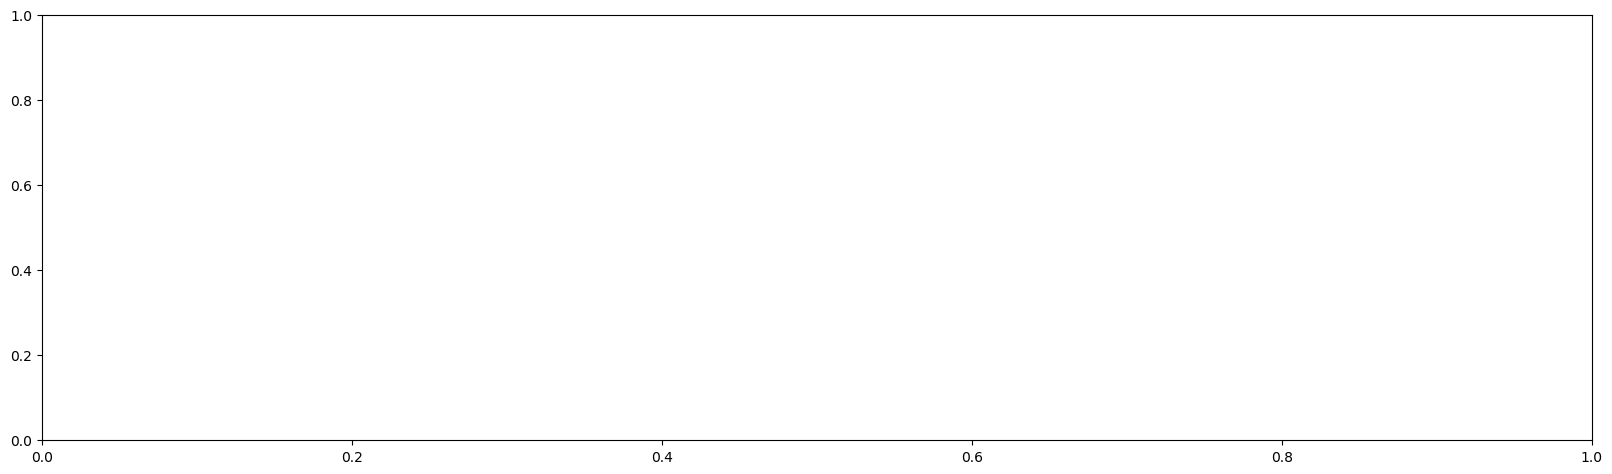

In [17]:
fig = plt.figure(figsize=(20,80), dpi=100)
for i in range(8):
    ax = fig.add_subplot(12,1,i+1)
    ax.plot(data[0,:,i])
plt.show()